Peter Mann (2018) [University of St Andrews].

# Addition-deletion networks

In this notebook an addition-deletion network is studied using heterogeneous mean field theory (HMF) developed in [1]. In the experiment, nodes are added and removed from an existing network until an equilibrium is reached. The model is a $\dim(k_{\text{max}})$ coupled system, where $k_{\text{max}}$ is the highest degree of the network. The system is 

\begin{align}
\frac{d p_k(t)}{dt} =\ &-\mu_{\text{d}} p_k(t) - \mu_{\text{d}} kp_k(t) + \mu_{\text{d}}(k+1)p_{k+1}(t) \nonumber\\
&+\mu_{\text{b}} c\pi_{k-1}p_{k-1}(t) -\mu_{\text{b}}c\pi_k p_k(t) +\mu_{\text{b}}\phi_k
\end{align}

where $c$ is the average degree of a newborn node and we have defined $p_k(t)$ as the time dependent degree distribution. In an elementary example, we set $\mu= \pi=1$ for ease (birth/death rate and attachment kernel). Such a network is of stationary size and stochastically fluctuates about a given order. Setting $\pi_k=1$ indicates incoming nodes have a uniform probability of attaching to existing nodes (independent of $k$). Their degree is either a delta function

\begin{equation}
\delta_{c,k} = 
\begin{cases}
1 & k=c\\
0 & k\neq c
\end{cases}
\end{equation}

or a Poisson distribution

\begin{equation}
\phi_k = e^{e^{-c}c^k}\frac{1}{k!}
\end{equation}

Exact analytical solutions for this system are known in certian cases [1]. We will instead turn to numerical integration using `scipy.odeint` and will require the full coupling of all $k$ levels. This class is particuarly useful for integrating systems where the degree classes are not independent of one another (unlike in `hmf.py` available elsewhere in the package).

In [2]:
import network_processes
import epyc

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
# create an instance of the class
e = network_processes.addition_deletion()

# initialise the experimental parameters
params = dict()
params['time'] = range(0,10000) # integration time
params['N'] = 5000              # network size
params['k_max'] = 30            # maximum degree
params['kmean'] = 10            # mean degree
params['class_dimension'] = 1   # number of equations per class

# run the experiment with delta function
params['poisson'] = False       # flag for Poisson distribution
params['delta'] = True          # flag for delta function
res_delta = e.set(params).run()

# run the experiment with Poisson distribution
params['poisson'] = True        # flag for Poisson distribution
params['delta'] = False         # flag for delta function
res_Poisson = e.set(params).run()

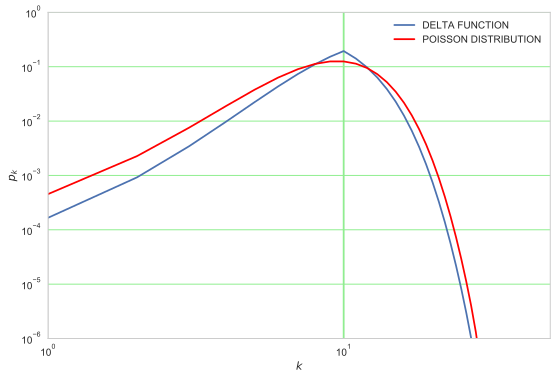

In [9]:
# plot the results!
sns.set_style("whitegrid")

fig = plt.figure(figsize = (9, 6))
plt.loglog()
plt.xlim([1, 50])
plt.ylim(1e-6, 1)
plt.ylabel('$p_k$')
plt.xlabel('$k$')
plt.grid(axis = 'y', color = 'lightgreen')
plt.plot([10, 10], [1e-6, 1], color = 'lightgreen')

plt.plot(res_delta['results']['sol'], label='DELTA FUNCTION')
plt.plot(res_Poisson['results']['sol'], label='POISSON DISTRIBUTION', color='r')

plt.legend()
_ = plt.show()

Comparison of this graph with figure 1 in [1] shows the excellent agreement for the delta function $\delta_{c,k}$. 

The modification of this class to study other addition-deletion networks is now straightforward with the introduction of different attachment kernels, base networks and removal methods. Further, the class can be used to study any coupled system where the degree classes are not independent subsystems.

[1] C. Moore, G. Ghoshal, and M. E. J. Newman, “Exact solutions for models of evolving networks 
           with addition and deletion of nodes,” Phys. Rev. E, 
           vol. 74, p. 036121, Sep 2006.